# Lab 2

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

## Detecting features with ORB descriptors

In [7]:
def orb_detect(img1, img2):
    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    print("Keypoints: {}, descriptors: {}".format(len(kp1), des1.shape))
    print("Keypoints: {}, descriptors: {}".format(len(kp2), des2.shape)) 
    return kp1, kp2, des1, des2

## Matching features with Brute-Force (openCV)

In [45]:
def bf_match(img1, img2, kp1, kp2, des1, des2):
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot()
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3)
    plt.show()

## Matching features with custom algorithm

In [46]:
def custom_match(img1, img2, kp1, kp2, des1, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance = hamming(k1, k2) * len(k1),
                                     _imgIdx = 0, _queryIdx = i, _trainIdx = j))
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot()
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3)
    plt.show()

## Reading images

In [48]:
def show_img(img):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [124]:
img_1 = cv.cvtColor(cv.imread("lab_2_img_1.jpg"), cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(cv.imread("lab_2_img_2.jpg"), cv.COLOR_BGR2RGB)
img_3 = cv.cvtColor(cv.imread("lab_2_img_3.jpg"), cv.COLOR_BGR2RGB)
img_4 = cv.cvtColor(cv.imread("lab_2_img_4.jpg"), cv.COLOR_BGR2RGB)
img_5 = cv.cvtColor(cv.imread("lab_2_img_1_gray.jpg"), cv.COLOR_BGR2RGB)
img_6 = cv.cvtColor(cv.imread("lab_2_img_2_gray.jpg"), cv.COLOR_BGR2RGB)
img_7 = cv.cvtColor(cv.imread("lab_2_img_3_gray.jpg"), cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(cv.imread("lab_2_img_4_gray.jpg"), cv.COLOR_BGR2RGB)

## First image

In [130]:
kp1, kp2, des1, des2 = orb_detect(img_1, img_2)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


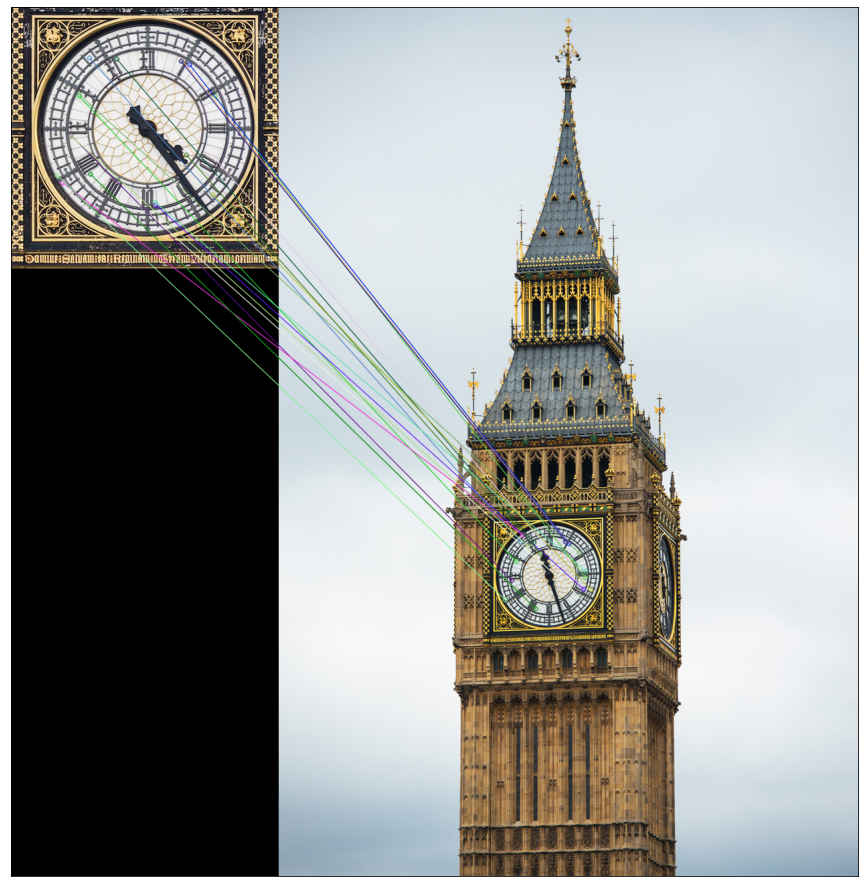

In [123]:
bf_match(img_1, img_2, kp1, kp2, des1, des2)

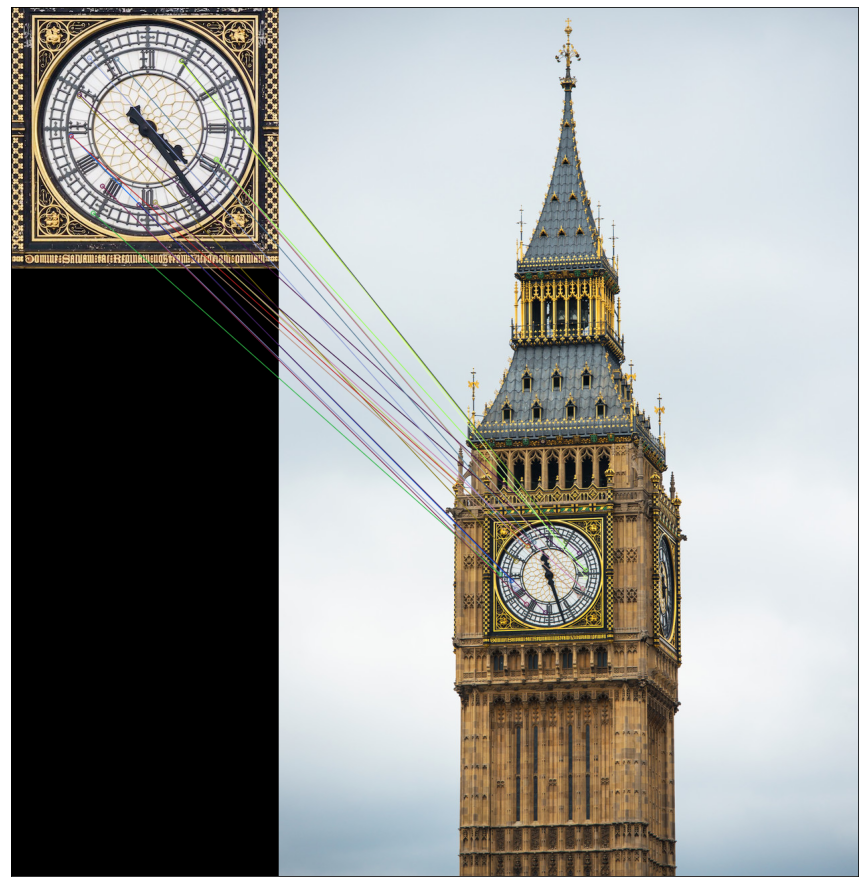

In [131]:
custom_match(img_1, img_2, kp1, kp2, des1, des2)

In [132]:
kp1, kp2, des1, des2 = orb_detect(img_5, img_6)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


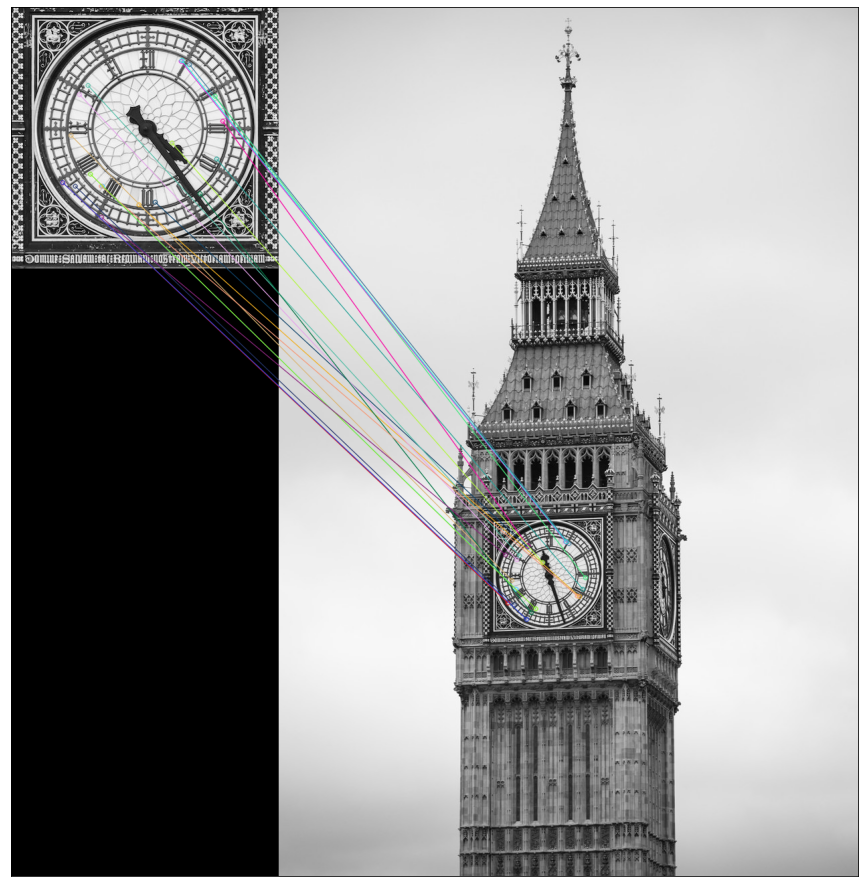

In [126]:
bf_match(img_5, img_6, kp1, kp2, des1, des2)

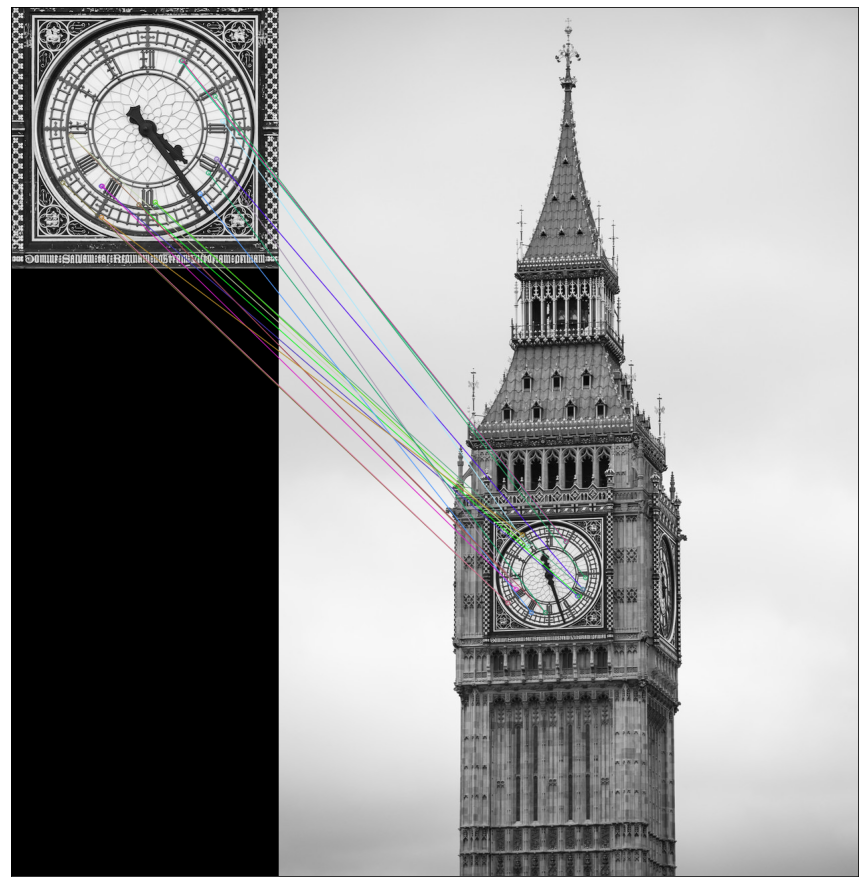

In [133]:
custom_match(img_5, img_6, kp1, kp2, des1, des2)

## Second image

In [134]:
kp1, kp2, des1, des2 = orb_detect(img_3, img_4)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


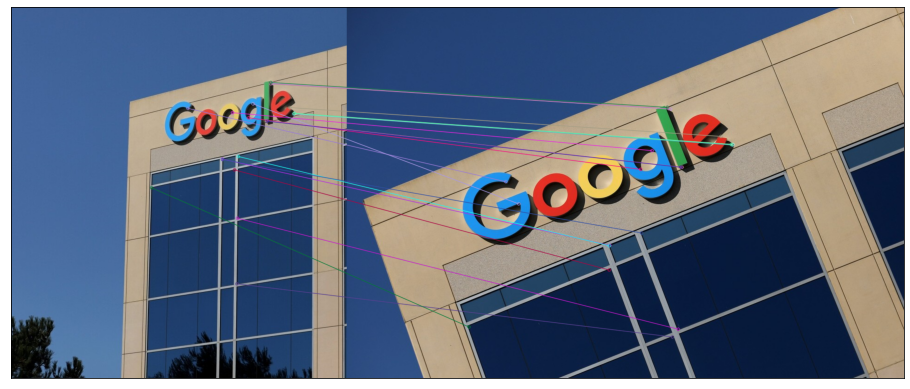

In [120]:
bf_match(img_3, img_4, kp1, kp2, des1, des2)

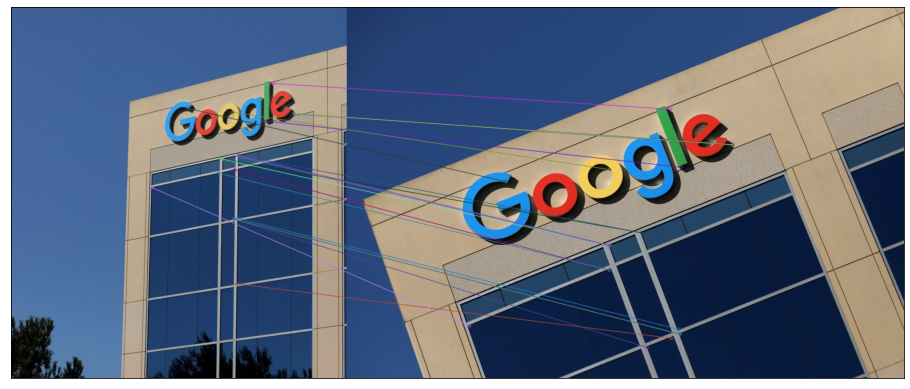

In [135]:
custom_match(img_3, img_4, kp1, kp2, des1, des2)

In [136]:
kp1, kp2, des1, des2 = orb_detect(img_7, img_8)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


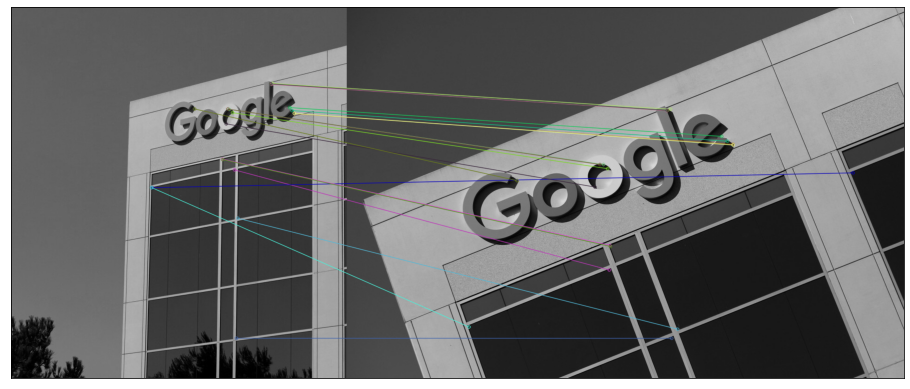

In [137]:
bf_match(img_7, img_8, kp1, kp2, des1, des2)

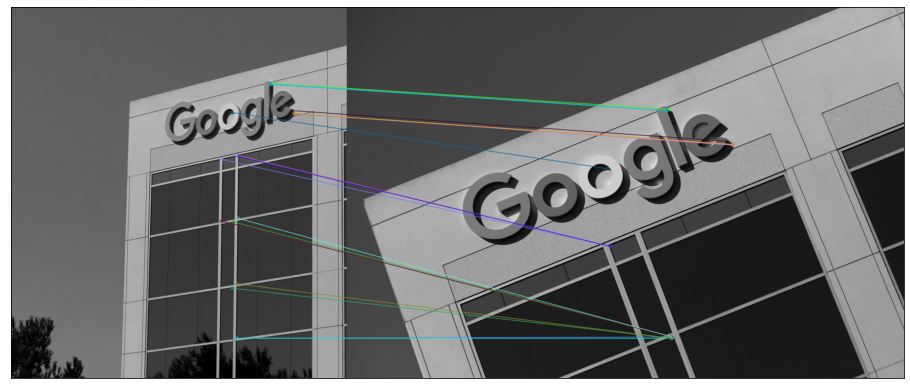

In [138]:
custom_match(img_7, img_8, kp1, kp2, des1, des2)